## Student Name: [Enter your name here]

In [32]:
#import any required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.compose import ColumnTransformer
import tensorflow.keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

### Step 1 – Data Acquisition
Load the training data 'house_prices_train.csv' into a dataframe. Explore the data to get a better understanding of its structure and any data preparation steps that you need to perform.

In [3]:
#Load the data and view the dimensions

url      = 'house_prices_train.csv' #TODO: provide the url for the training data
data     = pd.read_csv(url)
data_dim = data.shape

print ('There are {} rows and {} columns.'.format(data_dim[0], data_dim[1]))

There are 1460 rows and 81 columns.


Lets view samples of the data

In [4]:
#view a few observations
data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [60]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

#### Use your intuition!
At first glance is there any field that, without a doubt, will not contribute to the predictions?

In [5]:
#TODO: remove/exclude the unnecessary field(s) that will not contribute towards the prediction
data.drop(columns= ['Alley','PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold'], axis = 1, inplace = True)

### Step 2 – Data Exploration
- Gather summary/descriptive statistics and inspect **all the fields**. This can help you to identify outliers and detect any inconsistencies
- View the frequency of missing values.

In [6]:
data.describe()#TODO: gather descriptive statistics to view the range of values in each field. 



,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,2010.000000,755000.000000


In [7]:
data.isnull() #TODO: show the frequency of missing values


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


State your observations about the summary statistics and missing values **(in this cell)**:
- 
- 
- 
- 
- 

Note: recall that not all missing values need to be deleted, some of them can be imputed.

#### The continuous and categorical independent variables
List the continuous and categorical data and state any discrepancy between the number of expected records in the dataset and the `count` that is reported above. 

For the fields that are discussed, view `data_description.txt` which explains the range of values for each field. What does this tell you about these 'missing' values. How do you recommend addressing them? **(You do not need to demonstrate your recommendations)**


In [9]:
data.count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
                 ... 
PoolArea         1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 75, dtype: int64

#### The dependent variable
Are there any discrepancies with the dependent variable? Plot a histogram showing its distribution. Is the distribution skewed?

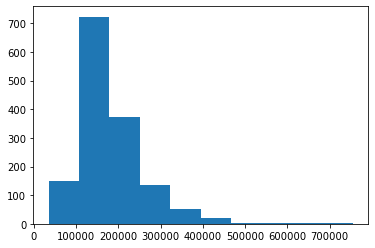

In [11]:
x = data['SalePrice']
plt.hist(x, bins = 10)#TODO: Plot the histogram
plt.show()
#The distribution is skewed with a majority lying between 100K and 300K.

## Building the Pipeline
Based on your recommendations above, lets build a pipeline that does the following:
- prepare the data and perform data imputation
- transform the continuous and categorical data (scaling and encoding respectively)
- select the useful features e.g. feature selection, *you can optionally include this in the pipeline or perform this step prior to building the pipeline*
- build, train and evaluate the neural network using Keras.
- perform hyper-parameter tuning using RandomSearchCV **(optional)**
- make predictions with new data

### Step 3 – Data Preparation
Here is some helpful information on [preprocessing and feature extraction pipelines in scikit-learn](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html)

<span style="color:red">NOTE: You can modify the cell below to suit your needs. However, ensure that the preprocessing steps that you perform is done in the data frame e.g. `data` </span>

In [25]:
#impute missing continuous values with the median and scale the data

continuous_features  = ['MSSubClass', 'OverallQual', 'OverallCond'] #TODO: provide a list of continuous fields that will be used in the model(except the dependent variable)
continous_transformer = Pipeline(
    steps = [
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
    ])

#impute the NA categorical values and encode the data

categorical_features = ['YrSold', 'SaleType', 'SaleCondition'] #TODO: provide a list of categorical fields that will be used in the model
categorical_transformer = Pipeline(
    steps = [
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'NotApp')), #Use an alternative value to indicate NA in the dataset
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ])

data_preprocessor   = ColumnTransformer(
    transformers = [
        ('continious', continous_transformer, continuous_features),
        ('categorical', categorical_transformer, categorical_features)
    ])

#NOTE: the steps above will not be performed until we call `fit_transform` (in the next cell).


### Step 4 – Data Transformation & Feature Selection
Here is some helpful information on [feature selection as part of a pipeline](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection-as-part-of-a-pipeline). If you add a feature selection algorithm to the pipeline, ensure that it supports regression.

In [26]:
data_prep_pipeline  = Pipeline(steps=[('preprocessor', data_preprocessor)])#This performs the data preparation steps in the cell above
                       #TODO: identify a feature selection algorithm or exclude this line if you have previously pe

transformed_data    = data_prep_pipeline.fit_transform(data.iloc[:, :-1], data['SalePrice']) #transform the data


### Step 5 – Building the Model
#### Build the neural network using Keras
Build a feed forward neural network with: an input layer, hidden layers and one output layer. 

Note: you are required to provide a suitable [optimizer](https://keras.io/api/optimizers/) and [loss function](https://keras.io/api/losses/) for the regression task. Optimizers include: 'Adam', 'SGD' and RMSprop. Loss functions include: 'mean_squared_error', 'mean_squared_logarithmic_error', 'mean_absolute_error'

In [50]:
X = transformed_data #this is the transformed data from the pipeline
y = data['SalePrice'] #this is the output

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6, random_state = 42)

#Build a sequential model with at least three dense layers (you can add more layers as needed)
#Note: you can also add this keras model to the data preprocessing pipeline but we can skip that step for now.
ffnn_model = Sequential()
ffnn_model.add(Dense(40, activation='relu', input_shape=(X.shape[1],))) #X.shape[1] is the number of selected features 

ffnn_model.add(Dense(30, activation = 'relu', input_shape=(X.shape[1],)))
ffnn_model.add(Dense(20, activation = 'relu', input_shape=(X.shape[1],)))

inputs = tensorflow.random.uniform(shape=(10, 20))#TODO: Add the first hidden layer with a suitable number of units/neurons and the 'relu' activation function
#TODO: Add the second hidden layer with a suitable number of units/neurons and the 'relu' activation function

outputs = layer(inputs) #TODO: Add the output layer

ffnn_model.compile(optimizer= 'Adam', #TODO: state the optimize
                   loss= mean_squared_error,      #TODO: state the loss function
                   metrics=  mean_squared_error   #TODO: state the metric
                  )

ffnn_history = ffnn_model.fit(X_train, y_train, 
                             validation_split = 0.7,
                             epochs = 4,
                             batch_size = 4,
                             verbose = 1)


ValueError: `validation_split` is only supported for Tensors or NumPy arrays, found following types in the input: [<class 'scipy.sparse.csr.csr_matrix'>]

In [41]:
# Visualize the training and validation loss
plt.plot(ffnn_history.history['loss'], 'b', ffnn_history.history['val_loss'], 'orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

NameError: name 'ffnn_history' is not defined

### Let's use the neural network to make predictions!

#### Load the test data

In [93]:
#TODO: Load the data from `house_prices_test.csv`
test_data_url = 'house_prices_test.csv'
test_data = pd.read_csv(test_data_url)
test_data.drop(columns= ['Alley','PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold'], axis = 1, inplace = True)

#### Prepare the test data using the pipeline
This will impute any missing values and scale/encode the fields.

In [94]:
prep_test_data = data_prep_pipeline.transform(test_data)

#### Use the neural network to make predictions

In [ ]:
result = ffnn_model.predict( #TODO: provide the preprocessed test data (above)
        )

## Summary
Display samples of the predictions from your model and summarize your thoughts on the model's performance, the training process and its ability to generalize with new data. What are your recommendations to improve the model in the future?